## Question

Please write a simple compiler – program, which translates one quantum circuit into another, using a restricted set of gates.

You need to consider just the basic gates for the input circuit, such as (I, H, X, Y, Z, RX, RY, RZ, CNOT, CZ).

The output circuit should consist only from the following gates: RX, RZ, CZ. In other words, each gate in the original circuit must be replaced by an equivalent combination of gates coming from the restricted set (RX, RZ, CZ) only.

For example, a Hadamard gate after compilation looks like this:

RX(pi/2)RZ(pi/2)

Analyze what’s the overhead of the compiled program compared to the original one and propose how to improve it. What we mean by overhead is the following: by replacing all the initial gates with the restricted set of gates given in the problem, you will see that the resulting circuit is much more involved than the original one. This is what we called the overhead, and you may think how to treat this problem, i.e. you could try to simplify as much as possible the resulting circuit.

## Solution

### Import the libraries

In [1]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap
from qiskit.dagcircuit import DAGCircuit

### Conversions

I'll first convert $X$ to $RX$ gate,

$$X = -i RX(\pi)$$

Similarly for $Z$ gate,

$$Z = -i RZ(\pi)$$

Now because,

$$XZ = -i Y$$

Hence I am able to find Y gate,
$$Y = RX(\pi)RZ(\pi)$$

For Hadamard gate, 

$$H = -i RX(\tfrac{\pi}{2})RZ(\tfrac{\pi}{2})RX(\tfrac{\pi}{2})$$

For $CNOT$ gate, I have to convert it in $CZ$ gate, I can do so by applying applying Hadamard gate to the second qubit and then applying $CZ$ gate and then applying Hadamard gate again to the second qubit. This can be proved through the identity $HXH = Z$. The simple reasoning behind this is, we know that the Hadamard transforms the states $|0\rangle$  and  $|1\rangle$  to the states  $|+\rangle$  and  $|−\rangle$ . We also know that the effect of the  $Z$  gate on the states  $|+\rangle$  and  $|−\rangle$  is the same as that for $X$ on the state  $|0\rangle$  and  $|1\rangle$ .

We see the single qubit gates only differ by a global phase which we can neglect as it doesn't affect the measurement.

Therefore I have achieved the transformation of every gate.

### The function which describes the operations

In [2]:
def operations(n, ops, q, params): #Function for the transformation
    
    circ = QuantumCircuit(n)
    print('-----------')
    
    for i in range(len(ops)):
        if ops[i] == 'x':
            circ.rx(np.pi, int(q[i][0]))
           
        if ops[i] == 'y':
            circ.rx(np.pi, int(q[i][0]))
            circ.rz(np.pi, int(q[i][0]))

        if ops[i] == 'z':
            circ.rz(np.pi, int(q[i][0]))

        if ops[i] == 'h':
            circ.rx(np.pi/2, int(q[i][0]))
            circ.rz(np.pi/2, int(q[i][0]))
            circ.rx(np.pi/2, int(q[i][0]))
            
        if ops[i] == 'cnot' or ops[i] == 'cx':
            circ.rx(np.pi/2, int(q[i][1]))
            circ.rz(np.pi/2, int(q[i][1]))
            circ.rx(np.pi/2, int(q[i][1]))
            circ.cz(int(q[i][0]), int(q[i][1]))
            circ.rx(np.pi/2, int(q[i][1]))
            circ.rz(np.pi/2, int(q[i][1]))
            circ.rx(np.pi/2, int(q[i][1]))
            
        if ops[i] == 'rx':
            circ.rx(params, int(q[i][0]))
               
        if ops[i] == 'rz':
            circ.rz(params, int(q[i][0]))
            
        if ops[i] == 'cz':
            circ.cz(int(q[i][0]), int(q[i][1]))
    
    return circ

### Function for asking input of gates and the respective qubits

In [3]:
def create_circ():

    num_qubits = input('No. of qubits in Quantum Circuit: ')

    gate_applied = []
    qubit_applied = []
    continue_ = 1
    params = 0

    while continue_ != '0':
        gate_applied.append(input('Gate Applied: '))
        qubit_applied.append(input('Qubit Applied: ').split())
        continue_ = input('If you dont want to continue, press 0, else press 1: ')
        if gate_applied == 'rx' or gate_applied == 'ry' or gate_applied == 'rz':
            params = int(input('The parameters: '))


    circuit = operations(num_qubits, gate_applied, qubit_applied, params)
    
    return circuit

### Reducing the overhead

In [4]:
new = create_circ()

No. of qubits in Quantum Circuit: 7
Gate Applied: h
Qubit Applied: 0
If you dont want to continue, press 0, else press 1: 1
Gate Applied: cx
Qubit Applied: 0 4
If you dont want to continue, press 0, else press 1: 1
Gate Applied: cx
Qubit Applied: 2 3
If you dont want to continue, press 0, else press 1: 1
Gate Applied: cx
Qubit Applied: 6 1
If you dont want to continue, press 0, else press 1: 1
Gate Applied: cx
Qubit Applied: 5 0
If you dont want to continue, press 0, else press 1: 1
Gate Applied: rz
Qubit Applied: 2
If you dont want to continue, press 0, else press 1: 1
Gate Applied: cx
Qubit Applied: 5 0
If you dont want to continue, press 0, else press 1: 0
-----------


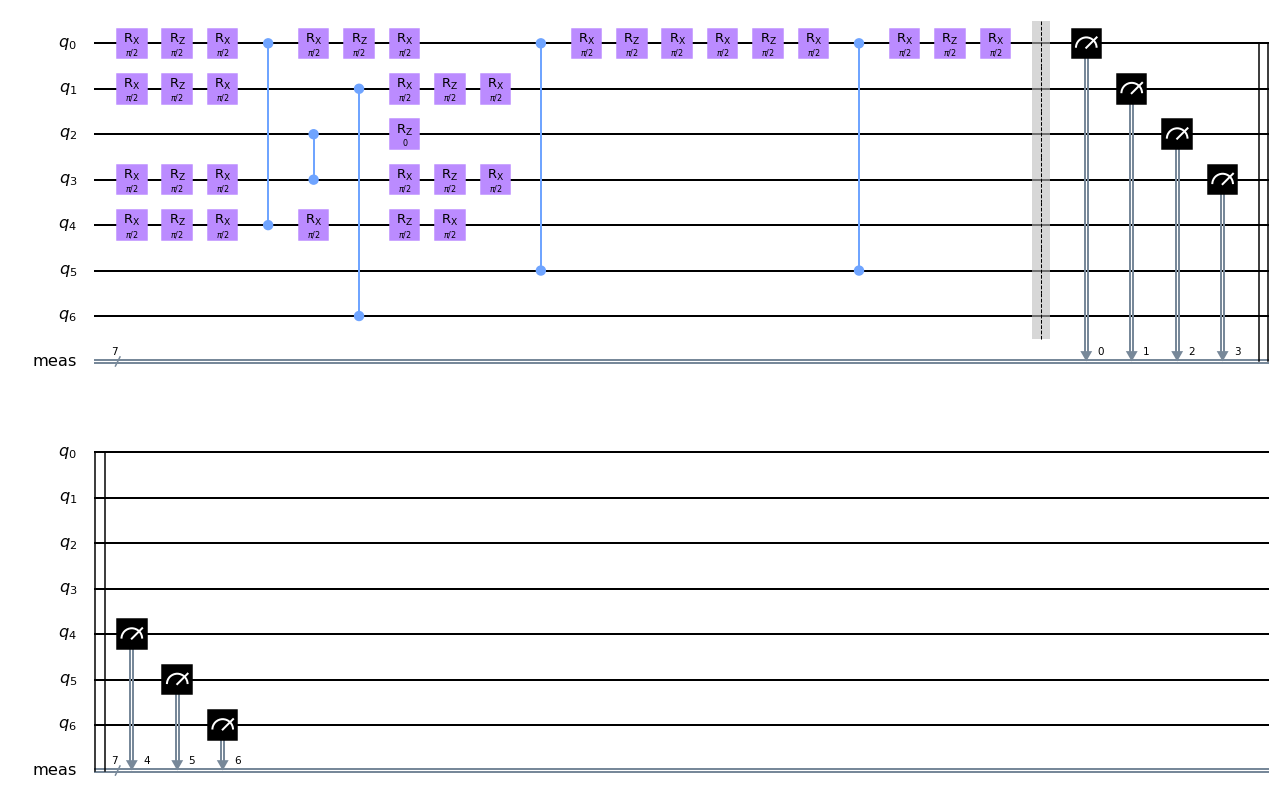

In [22]:
new.draw('mpl')

In [12]:
# Build noise model from backend properties
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
noise_model = NoiseModel.from_backend(backend)

/home/rochisha/anaconda3/envs/quantum/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.070868 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.069857 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing e

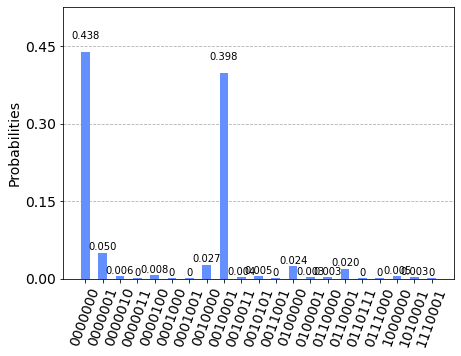

In [18]:
result = execute(new, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 noise_model=noise_model).result()
counts = result.get_counts()
plot_histogram(counts)

To reduce the overhead of the new circuit I create a transpiler `Basic Swap`. It reduces the overhead of `CNOT` gates by applying `SWAP` gates using the `coupling map` and `DAG circuit`

Reference: https://qiskit.org/documentation/tutorials/circuits_advanced/4_transpiler_passes_and_passmanager.html

In [19]:
from copy import copy

from qiskit.transpiler.basepasses import TransformationPass
from qiskit.transpiler import Layout
from qiskit.circuit.library import SwapGate


class BasicSwap(TransformationPass):
    """Maps (with minimum effort) a DAGCircuit onto a `coupling_map` adding swap gates."""

    def __init__(self,
                 coupling_map,
                 initial_layout=None):
        """Maps a DAGCircuit onto a `coupling_map` using swap gates.

        Args:
            coupling_map (CouplingMap): Directed graph represented a coupling map.
            initial_layout (Layout): initial layout of qubits in mapping
        """
        super().__init__()
        self.coupling_map = coupling_map
        self.initial_layout = initial_layout

    def run(self, dag):
        """Runs the BasicSwap pass on `dag`.

        Args:
            dag (DAGCircuit): DAG to map.

        Returns:
            DAGCircuit: A mapped DAG.

        Raises:
            TranspilerError: if the coupling map or the layout are not
            compatible with the DAG
        """
        new_dag = DAGCircuit()
        for qreg in dag.qregs.values():
            new_dag.add_qreg(qreg)
        for creg in dag.cregs.values():
            new_dag.add_creg(creg)


        if self.initial_layout is None:
            if self.property_set["layout"]:
                self.initial_layout = self.property_set["layout"]
            else:
                self.initial_layout = Layout.generate_trivial_layout(*dag.qregs.values())

        if len(dag.qubits()) != len(self.initial_layout):
            raise TranspilerError('The layout does not match the amount of qubits in the DAG')

        if len(self.coupling_map.physical_qubits) != len(self.initial_layout):
            raise TranspilerError(
                "Mappers require to have the layout to be the same size as the coupling map")

        canonical_register = dag.qregs['q']
        trivial_layout = Layout.generate_trivial_layout(canonical_register)
        current_layout = trivial_layout.copy()

        for layer in dag.serial_layers():
            subdag = layer['graph']

            for gate in subdag.two_qubit_ops():
                physical_q0 = current_layout[gate.qargs[0]]
                physical_q1 = current_layout[gate.qargs[1]]
                if self.coupling_map.distance(physical_q0, physical_q1) != 1:
                    # Insert a new layer with the SWAP(s).
                    swap_layer = DAGCircuit()

                    path = self.coupling_map.shortest_undirected_path(physical_q0, physical_q1)
                    for swap in range(len(path) - 2):
                        connected_wire_1 = path[swap]
                        connected_wire_2 = path[swap + 1]

                        qubit_1 = current_layout[connected_wire_1]
                        qubit_2 = current_layout[connected_wire_2]

                        # create qregs
                        for qreg in current_layout.get_registers():
                            if qreg not in swap_layer.qregs.values():
                                swap_layer.add_qreg(qreg)

                        # create the swap operation
                        swap_layer.apply_operation_back(SwapGate(),
                                                        qargs=[qubit_1, qubit_2],
                                                        cargs=[])

                    # layer insertion
                    order = current_layout.reorder_bits(new_dag.qubits)
                    new_dag.compose(swap_layer, qubits=order)

                    # update current_layout
                    for swap in range(len(path) - 2):
                        current_layout.swap(path[swap], path[swap + 1])

            order = current_layout.reorder_bits(new_dag.qubits)
            new_dag.compose(subdag, qubits=order)

        return new_dag

In [20]:
pm = PassManager()
coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
coupling_map = CouplingMap(couplinglist=coupling)

pm.append([BasicSwap(coupling_map)])

out_circ = pm.run(new)

<ipython-input-19-1a0c074efa34>:50: DeprecationWarning: dag.qubits() and dag.clbits() are no longer methods. Use dag.qubits and dag.clbits properties instead.
  if len(dag.qubits()) != len(self.initial_layout):


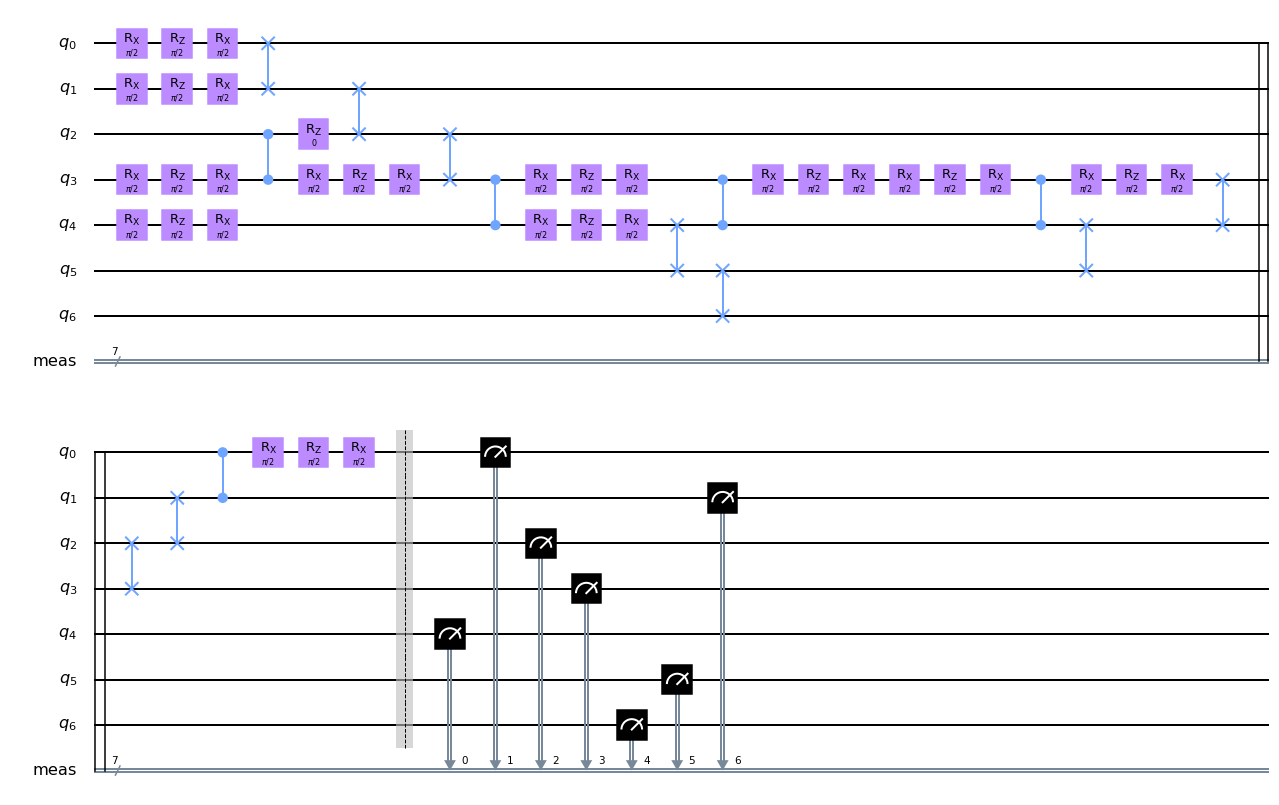

In [21]:
out_circ.draw('mpl')

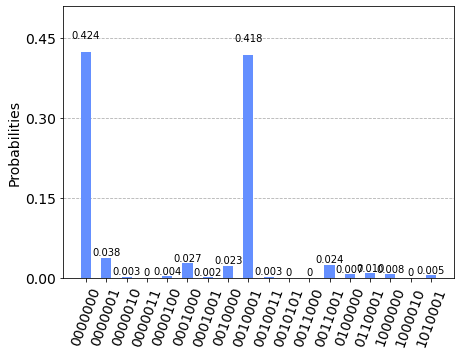

In [24]:
result = execute(out_circ, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 noise_model=noise_model).result()
counts = result.get_counts()
plot_histogram(counts)